<a href="https://colab.research.google.com/github/sinheechan/ML/blob/main/%5BDataset%5D_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EC%BA%98%EB%A6%AC%ED%8F%AC%EB%8B%88%EC%95%84_%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9_%EB%B6%84%EC%84%9D_0108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Dataset] 캘리포니아 주택가격 분석

1990년대 초에 캘리포니아 주를 20640 개 구역으로 쪼갠 후 구역별로 통계 자료를 조사한 데이터셋이다.

## 1. 초기 설정

### 1.1 라이브러리 Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 행렬 제한
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80

# 넘파이 옵션
np.random.seed(2024)
np.set_printoptions(precision = 4, suppress = True)

# 그래프 사이즈 조정
plt.rc("figure", figsize = (8,4))

# seaborn 그래프 사용 설정
sns.set_theme()


## 2 데이터 불러오기

In [3]:
housing = pd.read_csv("/content/housing.csv")

## 3. EDA

[Columns]

- 'longitude' : 위도
- 'latitude' : 경도
- 'housing_median_age' : 건축물 중위연령
- 'total_rooms' : 방의 총 개수
- 'total_bedrooms' : 침실 총 개수
- 'population' : 인구
- 'households' : 가구수
- 'median_income' : 중위소득
- 'median_house_value' : 주택 중위가격
- 'ocean_proximity' : 해안 근접도

### 3.1 데이터 구조 파악
- 'total_bedrooms' 특성: 207개의 결측치 포함된다.
- 'ocean_proximity' 특성: 수치형 데이터 아니다.

In [4]:
housing.shape

(20640, 10)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 3.2 시각화

- "ocean_proximity" : 범주형 데이터를 수치형 데이터로 변환한다.

In [7]:
pd.factorize(housing["ocean_proximity"])

(array([0, 0, 0, ..., 2, 2, 2]),
 Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object'))

- 경도와 위도 정보를 이용해서 구역의 분포를 파악한다.

<Axes: xlabel='longitude', ylabel='latitude'>

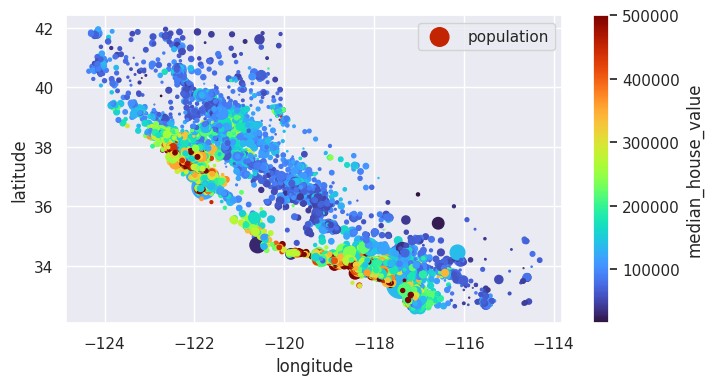

In [8]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", grid = True,
             s = housing["population"] / 100, label = "population",
             c = "median_house_value",
             colormap = "turbo",
             colorbar = True)

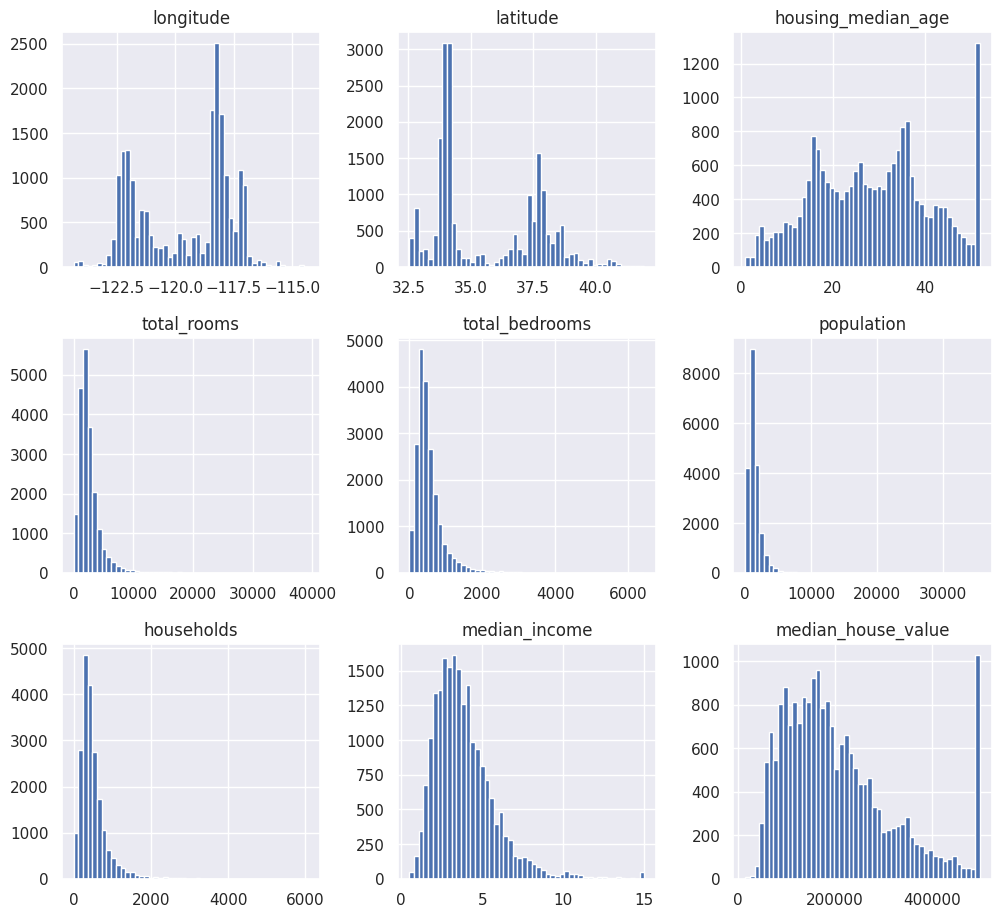

In [9]:
housing.hist(bins = 50, figsize = (12,11))
plt.show()

## 4. 데이터 전처리

### 4.1 소득을 구간으로 표시

- 1.5 이하 = 1
- 1.5 ~ 3.0 = 2
- 3.0 ~ 4.5 = 3
- 4.5 ~ 6.0 = 4
- 6.0 초과 = 5

- 소득은 중위소득이 가장 빈도가 많은 것으로 확인되었다.

In [10]:
bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf]
housing_income = pd.cut(housing["median_income"],
                        bins = bins,
                        labels = [1,2,3,4,5])

housing_income_sort = housing_income.value_counts().sort_index()
housing_income_sort

1     822
2    6581
3    7236
4    3639
5    2362
Name: median_income, dtype: int64

### 4.2 상관관계 분석

- 전체 칼럼을 파악한다.

In [11]:
num_f = housing.describe().columns
num_f

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

- 상관관계를 데이터 프레임으로 나타낸다.

In [12]:
corr = housing[num_f].corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


- 상관관계를 히트맵으로 시각화한다.

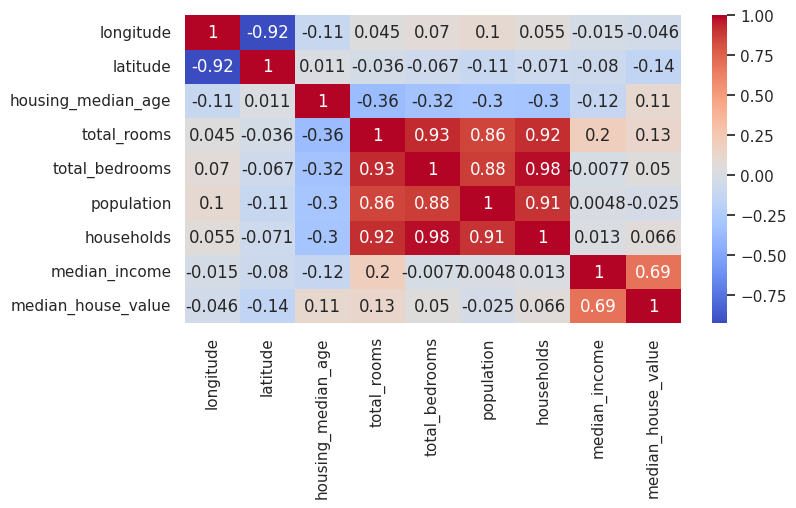

In [13]:
corr_hit = sns.heatmap(corr, annot = True, cmap = "coolwarm")

- 위 상관관계 분석 결과, 집값과 중위소득간의 관계가 0.688로 가장 상관성이 높아 심화 분석한다.

- 산점도 행렬 생성 : 집값, 중위소득, 나이

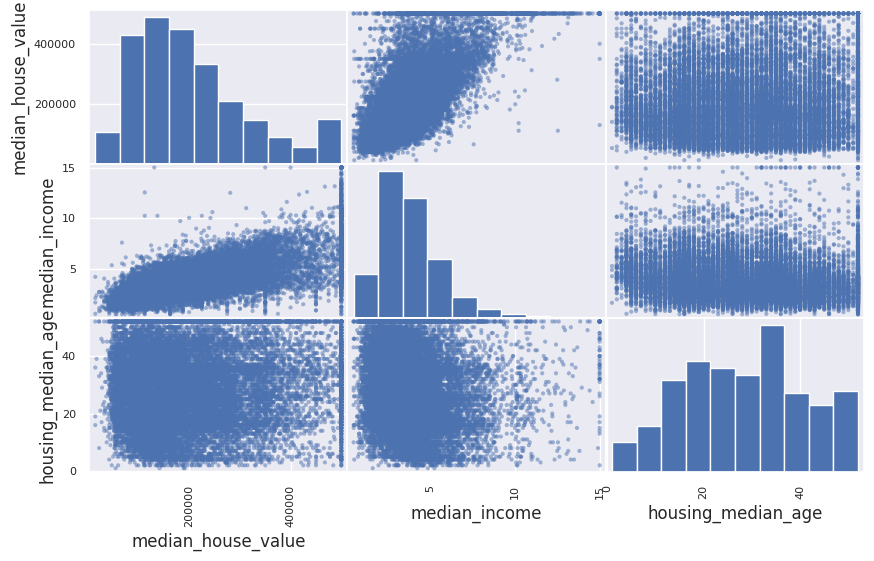

In [14]:
from pandas.plotting import scatter_matrix

attr = ["median_house_value", "median_income", "housing_median_age"]
scatter_matrix(housing[attr], figsize = (10,6))
plt.show()

- 그래프로 시각화 한 결과, 연령 변수는 집값과 중위소득에 있어서 유의미한 상관성은 없다.
- 또한 선형도 발견되지 않고 분산이 높게 책정되기 때문이다.

## 5. 데이터 전처리

### 5.1 이상치, 결측치 확인

- 소득구간에 따른 집값 시각화 분석 결과 이상치가 다수 포착된다.

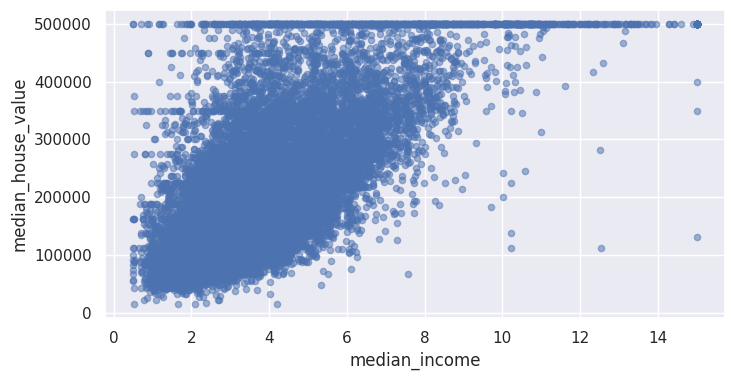

In [15]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",
             alpha = 0.5, grid = True)

plt.show()

- 결측치를 확인해보니 'total_bedrooms' 칼럼에서 결측치가 207건 발견되었다.

In [16]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

- 결측치가 포함된 행만 따로 뽑아 확인해본다.

In [17]:
mask = housing.isnull().any(axis = 1) # 결측치만 확인
housing[mask]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN


- 결측치가 존재하는 전체 행 수를 파악해보니 207건 동일하다.

In [19]:
housing[mask].shape

(207, 10)

### 5.2 이상치, 결측치 제거

-  'total_bedrooms' 칼럼의 결측치 발견되어 해당 결측치를 중위값으로 채운다.

In [20]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)

In [21]:
housing[mask]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,435.0,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0,<1H OCEAN


- 추가적인 결측치가 남아있는지 확인한다.

In [22]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 6. 데이터 스케일링

### 6.1 표준화

- 데이터셋의 평균값 0, 표준편차는 1이 되도록한다
- (값 - 평균값) / 표준편차

1) 표준화를 하기 위해서는 먼저 수치형 데이터만 남겨놓는다.
  - 수치형 데이터가 아닌 "ocean_proximity" 칼럼을 Drop한다.

In [23]:
housing_nume = housing.drop(["ocean_proximity"], axis = 1)

housing_nume

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


2) 칼럼 별 평균값을 구한다.

In [24]:
mean_df = housing_nume.mean()
mean_df

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           536.838857
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

3) 표준편차를 구한다.

In [25]:
std_df = housing_nume.std()
std_df

longitude                  2.003532
latitude                   2.135952
housing_median_age        12.585558
total_rooms             2181.615252
total_bedrooms           419.391878
population              1132.462122
households               382.329753
median_income              1.899822
median_house_value    115395.615874
dtype: float64

4) 위에서 평균과 표준편차를 구했으니 데이터를 표준화한다.

In [26]:
housing_stadard = housing_nume.sub(mean_df, axis = 1).div(std_df, axis = 1)
housing_stadard

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327803,1.052523,0.982119,-0.804800,-0.972453,-0.974405,-0.977009,2.344709,2.129580
1,-1.322812,1.043159,-0.607004,2.045841,1.357111,0.861418,1.669921,2.332181,1.314124
2,-1.332794,1.038478,1.856137,-0.535733,-0.827004,-0.820757,-0.843616,1.782656,1.258663
3,-1.337785,1.038478,1.856137,-0.624199,-0.719706,-0.766010,-0.733764,0.932945,1.165072
4,-1.337785,1.038478,1.856137,-0.462393,-0.612408,-0.759828,-0.629142,-0.012881,1.172871
...,...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388274,-0.512579,-0.443438,-1.216099,-1.115777
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.922380,-0.944382,-1.008396,-0.691576,-1.124443
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.123605,-0.369528,-0.174037,-1.142566,-0.992722
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.304820,-0.604415,-0.393743,-1.054557,-1.058583


### 6.2 정규화

- 최솟값 0, 최댓값 1로 변환
- (값 - 최솟값) / (최댓값 - 최솟값)

1) 데이터를 정규화한다.
- 수치형 데이터만 모아놓은 housing_nume 데이터의 최솟값과 최댓값을 구한다.
- 정규화를 실시한다.

In [27]:
max_df = housing_nume.max()
min_df = housing_nume.min()

housing_normal = housing_nume.sub(min_df, axis = 1).div(max_df - min_df, axis = 1)

housing_normal

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713


2) 정규화 분포를 담고있는 housing_normal 데이터의 간단한 통계정보를 추출한다.

In [ ]:
housing_normal.describe()

### 6.3 로그변환

- 큰 수를 작게 만들고 그로 인해 복잡한 계산을 쉽게 만든다.
- 왜도와 첨도를 줄여서 데이터 분석 시 의미있는 결과를 도출한다.

1) 집값과 관련 있는 수치형 칼럼의 데이터 분포를 먼저 시각화한다.

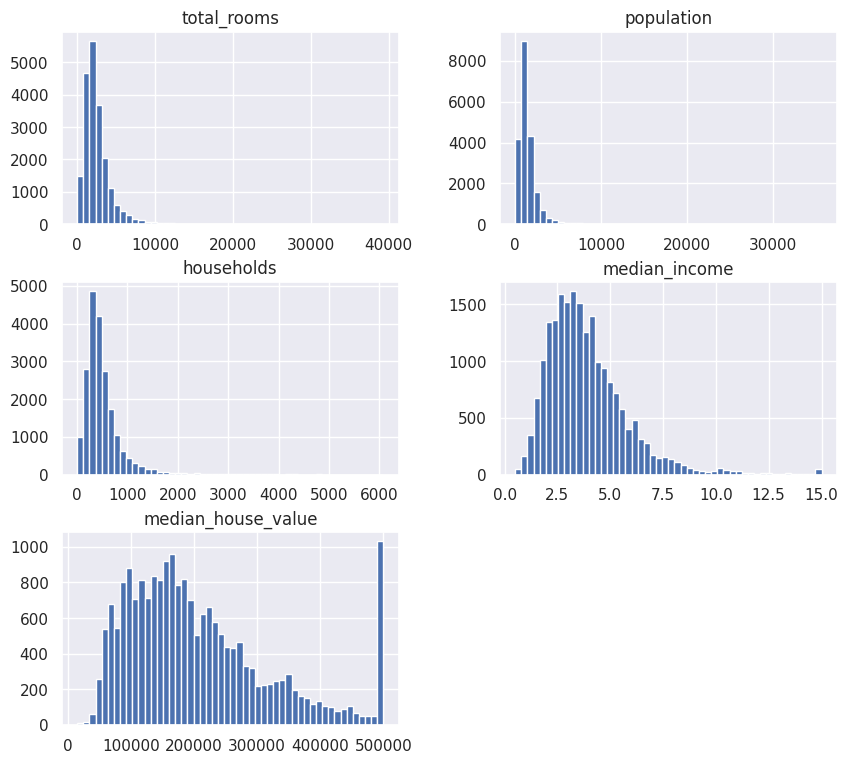

In [28]:
housing_nume[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']].hist(bins=50, figsize=(10,9))
plt.show()

2) 로그변환
- 넘파이(np)의 로그 함수를 활용하여 주택 데이터셋의 특정 수치형 특성들에 로그 변환을 적용한다.

In [29]:
housing_log = housing_nume[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']].apply(np.log)
housing_log

,total_rooms,population,households,median_income,median_house_value
0,6.779922,5.774552,4.836282,2.119287,13.022764
1,8.867709,7.783641,7.037028,2.116424,12.789684
2,7.290975,6.206576,5.176150,1.982022,12.771671
3,7.149917,6.324359,5.389072,1.730434,12.740517
4,7.394493,6.336826,5.556828,1.347086,12.743151
...,...,...,...,...,...
20635,7.417580,6.739337,5.799093,0.444878,11.265745
20636,6.546785,5.874931,4.736198,0.938756,11.252859
20637,7.720462,6.914731,6.070738,0.530628,11.432799
20638,7.528332,6.608001,5.855072,0.624440,11.346871


3) 로그변환된 데이터 시각화


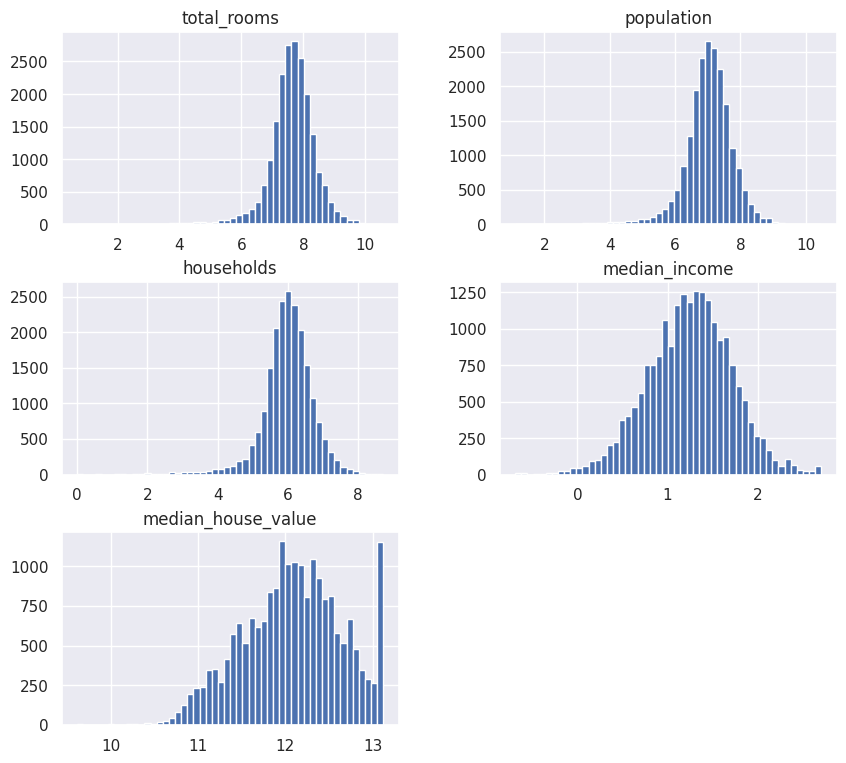

In [30]:
housing_log.hist(bins=50, figsize=(10,9))

plt.show()